In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-localapprox-fd-converge)=
# Convergence of finite differences

```{index} finite differences
```

All of the finite-difference formulas in the previous section based on equally spaced nodes converge as the node spacing $h$ decreases to zero. However, note that to discretize a function over an interval $[a,b]$, we use $h=(b-a)/n$, which implies $n=(b-a)/h=O(h^{-1})$. As $h\to 0$, the total number of nodes needed grows without bound. So we would like to make $h$ as large as possible while still achieving some acceptable accuracy.

```{index} ! truncation error; of a finite-difference formula
```

::::{proof:definition} Truncation error of a finite-difference formula
For the finite-difference method {eq}`fdformula` with weights $a_{-p},\ldots,a_{q}$, the **truncation error** is

```{math}
:label: truncFD
\tau_f(h) = f'(0) - \frac{1}{h} \sum_{k=-p}^{q} a_k f(kh).
```

The method is said to be **convergent** if $\tau_f(h)\to 0$ as $h\to 0$.
::::

Although we are measuring the truncation error only at $x=0$, it could be defined for other $x$ as well. The definition adjusts naturally to use $f''(0)$ for difference formulas targeting the second derivative.

All of the finite-difference formulas given in {numref}`section-localapprox-finitediffs` are convergent.

(example-fd-converge-FD11)=
````{proof:example}
The forward difference formula {eq}`forwardFD11` given by $(f(h)-f(0))/h$ yields

```{math}
:label: fd1trunc
\begin{split}
  \tau_f(h) &= f'(0) - \frac{ f(h)-f(0)}{h} \\
  &=f'(0) - h^{-1} \left[ \bigl( f(0) + h f'(0) + \tfrac{1}{2}h^2f''(0)+ \cdots \bigr) - f(0) \right] \\
  & = -\frac{1}{2}h f''(0) + O(h^2).
  \end{split}
```

The primary conclusion is that the truncation error is $O(h)$ as $h\to 0$.
````

## Order of accuracy

Of major interest is the rate at which $\tau_f\to 0$ in a convergent formula. 

```{index} ! order of accuracy; of a finite-difference formula
```
(definition-fd-converge-ooa)=
::::{proof:definition} Order of accuracy of a finite-difference formula
If the truncation error of a finite-difference formula satisfies $\tau_f(h)=O(h^m)$ for a positive integer $m$, then $m$ is the **order of accuracy** of the formula.
::::

Hence the forward-difference formula in {numref}`Example {number} <example-fd-converge-FD11>` has order of accuracy equal to 1; i.e., it is **first-order accurate**. All else being equal, a higher order of accuracy is preferred, since $O(h^m)$ vanishes more quickly for larger values of $m$. As a rule, including more function values in a finite-difference formula (i.e., increasing the number of weights in {eq}`fdformula`) increases the order of accuracy, as can be seen in {numref}`table-FDcenter` and {numref}`table-FDforward`.

Order of accuracy is calculated by expanding $\tau_f$ in a Taylor series about $h=0$ and ignoring all but the leading term.[^trunc]

[^trunc]: The term *truncation error* is derived from the idea that the finite-difference formula, being finite, has to truncate the series representation and thus cannot be exactly correct for all functions.

(example-fd-converge-FD12)=
````{proof:example}
We compute the truncation error of the centered difference formula {eq}`centerFD12`:
  
```{math}
:label: fd2trunc
\begin{split}
  \tau_f(h) &= f'(0) - \frac{ f(h)-f(-h)}{2h}\\
  &= f'(0) - (2h)^{-1} \left[ \bigl( f(0) + h f'(0) + \tfrac{1}{2}h^2f''(0)+ \tfrac{1}{6}h^3f'''(0)+ O(h^4) \bigr) \right.\\
  &\qquad - \left.  \bigl( f(0) - h f'(0) + \tfrac{1}{2}h^2f''(0) - \tfrac{1}{6}h^3f'''(0)+O(h^4) \bigr) \right] \\
  &= -(2h)^{-1} \left[ \tfrac{1}{3}h^3f'''(0) + O(h^4) \right] = O(h^2).
\end{split}
```

Thus, this method has order of accuracy equal to 2.
````

(demo-fdconverge-order12)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let's observe the convergence of the formulas in {numref}`Example {number} <example-fd-converge-FD11>` and {numref}`Example {number} <example-fd-converge-FD12>`, applied to the function $\sin(e^{x+1})$ at $x=0$.

In [2]:
f = x -> sin(exp(x+1))
exact_value = exp(1)*cos(exp(1))

-2.478349732955235

We'll compute the formulas in parallel for a sequence of $h$ values.

In [3]:
h = [ 5/10^n for n in 1:6 ]
FD1 = [];  FD2 = [];
for h in h
    push!(FD1, (f(h)-f(0)) / h )
    push!(FD2, (f(h)-f(-h)) / 2h ) 
end

pretty_table([h FD1 FD2],["h","FD1","FD2"])

┌────────┬──────────┬──────────┐
│      h │      FD1 │      FD2 │
├────────┼──────────┼──────────┤
│    0.5 │ -2.76858 │ -1.97047 │
│   0.05 │  -2.6128 │ -2.47552 │
│  0.005 │ -2.49211 │ -2.47832 │
│ 0.0005 │ -2.47973 │ -2.47835 │
│ 5.0e-5 │ -2.47849 │ -2.47835 │
│ 5.0e-6 │ -2.47836 │ -2.47835 │
└────────┴──────────┴──────────┘


All that's easy to see from this table is that FD2 appears to converge to the same result as FD1, but more rapidly. A table of errors is more informative.

In [4]:
error_FD1 = @. exact_value-FD1 
error_FD2 = @. exact_value-FD2
table = [h error_FD1 error_FD2]
pretty_table(table,["h","error in FD1","error in FD2"])

┌────────┬──────────────┬──────────────┐
│      h │ error in FD1 │ error in FD2 │
├────────┼──────────────┼──────────────┤
│    0.5 │     0.290226 │    -0.507878 │
│   0.05 │     0.134446 │  -0.00282948 │
│  0.005 │    0.0137555 │  -2.80378e-5 │
│ 0.0005 │   0.00137813 │  -2.80353e-7 │
│ 5.0e-5 │  0.000137838 │  -2.80297e-9 │
│ 5.0e-6 │   1.37841e-5 │  1.53291e-11 │
└────────┴──────────────┴──────────────┘


In each row, $h$ is decreased by a factor of 10, so that the error is reduced by a factor of 10 in the first-order method and 100 in the second-order method.

A graphical comparison can be useful as well. On a log-log scale, the error should (as $h\to 0$) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots to show $h$ _decreasing_ from left to right, which negates the slopes.

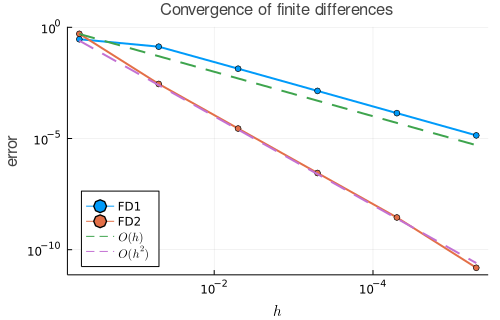

In [5]:
plot(h,abs.([error_FD1 error_FD2]),m=:o,label=["FD1" "FD2"],
    xflip=true,xaxis=(:log10,L"h"),yaxis=(:log10,"error"),
    title="Convergence of finite differences",leg=:bottomleft)

# Add lines for perfect 1st and 2nd order.
plot!(h,[h h.^2],l=:dash,label=[L"O(h)" L"O(h^2)"])

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Stability

The truncation error $\tau_f(h)$ of a finite-difference formula is dominated by a leading term $O(h^m)$ for an integer $m$. This error decreases as $h\to 0$. However, we have not yet accounted for the effects of roundoff error. To keep matters as simple as possible, let's consider the forward difference

```{math}
\delta(h) = \frac{f(x+h)-f(x)}{h}.
```

```{index} machine epsilon
```

As $h\to 0$, the numerator approaches zero even though the values $f(x+h)$ and $f(x)$ are not necessarily near zero. This is the recipe for subtractive cancellation error! In fact, finite-difference formulas are inherently ill-conditioned as $h\to 0$. To be precise, recall that the condition number for the problem of computing $f(x+h)-f(x)$ is

```{math}
\kappa(h) = \frac{ \max\{\,|f(x+h)|,|f(x)|\,\} }{ |f(x+h)-f(x) | },
```

implying a relative error of size $\kappa(h) \epsilon_\text{mach}$ in its computation. Hence the numerical value we actually compute for $\delta$ is

```{math}
\tilde{\delta}(h) &= \frac{f(x+h)-f(x)}{h}\, (1+\kappa(h)\epsilon_\text{mach}) \\
&= \delta(h) + \frac{ \max\{\,|f(x+h)|,|f(x)|\,\} }{ |f(x+h)-f(x) | }\cdot \frac{f(x+h)-f(x)}{h} \cdot \epsilon_\text{mach}.\\
```

Hence as $h\to 0$, 

```{math}
\bigl| \tilde{\delta}(h) - \delta(h) \bigr| = \frac{ \max\{\,|f(x+h)|,|f(x)|\,\} }{ h}\,\epsilon_\text{mach} \sim  |f(x)|\, \epsilon_\text{mach}\cdot h^{-1}.
```

Combining the truncation error and the roundoff error leads to

```{math}
:label: FDround
\bigl|  f'(x) - \tilde{\delta}(h) \bigr| \le \bigl| \tau_f(h) \bigr| + \bigl|f(x) \bigr|\, \epsilon_\text{mach} \, h^{-1}.
```

```{index} subtractive cancellation
```

Equation {eq}`FDround` indicates that while the truncation error $\tau$ vanishes as $h$ decreases, the roundoff error actually *increases* thanks to the subtractive cancellation. At some value of $h$ the two error contributions will be of roughly equal size. This occurs when

```{math}
\bigl|f(x)\bigr|\, \epsilon_\text{mach}\, h^{-1} \approx C h, \quad \text{or} \quad h \approx K \sqrt{\rule[0.05em]{0mm}{0.4em}\epsilon_\text{mach}},
```

for a constant $K$ that depends on $x$ and $f$, but not $h$. In summary, for a first-order finite-difference method, the optimum spacing between nodes is proportional to $\epsilon_\text{mach}^{\,\,1/2}$. (This observation explains the choice of `δ` in {numref}`Function {number} <function-fdjac>`.)


For a method of truncation order $m$, the details of the subtractive cancellation are a bit different, but the conclusion generalizes.

::::{proof:observation}
For computing with a finite-difference method of order $m$ in the presence of roundoff, the optimal spacing of nodes satisfies

```{math}
:label: FDtruncbalance
h_\text{opt} \approx \epsilon_\text{mach}^{\,\,1/(m+1)},
```

and the optimum total error is roughly $\epsilon_\text{mach}^{\,\, m/(m+1)}$.
::::

A different statement of the conclusion is that for a first-order formula, at most we can expect accuracy in only about half of the available machine digits. As $m$ increases, we get ever closer to using the full accuracy available. Higher-order finite-difference methods are both more efficient and less vulnerable to roundoff than low-order methods.

(demo-fdconverge-round)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let $f(x)=e^{-1.3x}$. We apply finite-difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [6]:
f = x -> exp(-1.3*x);
exact = -1.3

h = [ 1/10^n for n in 1:12 ]
FD1,FD2,FD4 = [],[],[]
for h in h 
    nodes = h*(-2:2)
    vals = @. f(nodes)
    push!(FD1, dot([   0    0 -1    1     0]/h,vals) )
    push!(FD2, dot([   0 -1/2  0  1/2     0]/h,vals) )
    push!(FD4, dot([1/12 -2/3  0  2/3 -1/12]/h,vals) )
end

table = [ h FD1 FD2 FD4 ]
pretty_table(table[1:4,:],["h","FD1","FD2","FD4"])

┌────────┬──────────┬──────────┬──────────┐
│      h │      FD1 │      FD2 │      FD4 │
├────────┼──────────┼──────────┼──────────┤
│    0.1 │ -1.21905 │ -1.30366 │ -1.29999 │
│   0.01 │ -1.29159 │ -1.30004 │     -1.3 │
│  0.001 │ -1.29916 │     -1.3 │     -1.3 │
│ 0.0001 │ -1.29992 │     -1.3 │     -1.3 │
└────────┴──────────┴──────────┴──────────┘


They all seem to be converging to $-1.3$. The convergence plot reveals some interesting structure to the errors, though.

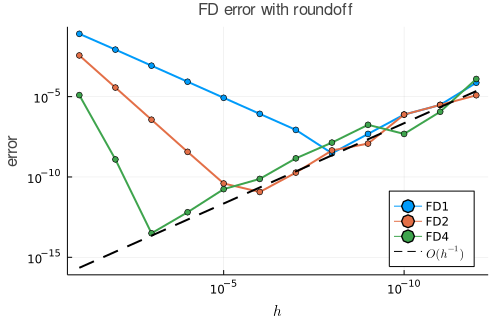

In [7]:
err = @. abs([FD1 FD2 FD4] - exact)

plot(h,err,m=:o,label=["FD1" "FD2" "FD4"],
    xaxis=(:log10,L"h"),xflip=true,yaxis=(:log10,"error"),
    title="FD error with roundoff",legend=:bottomright)

# Add line for perfect 1st order.
plot!(h,0.1*eps()./h,l=:dash,color=:black,label=L"O(h^{-1})")

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the fourth-order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy).
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

1. ⌨ Evaluate the centered second-order finite-difference approximation to $f'(4\pi/5)$ for $f(x)=\cos(x^3)$ and $h=2^{-1},2^{-2},\ldots,2^{-8}$. On a log-log graph, plot the error as a function of $h$ and compare it graphically to second-order convergence.

2. ✍ Derive the first two nonzero terms of the Taylor series at $h=0$ of the truncation error $\tau_{f}(h)$ for the formula {eq}`backwardFD11`.

3. ✍ Calculate the first nonzero term in the Taylor series of the truncation error $\tau_{f}(h)$ for the finite-difference formula defined by the second row of {numref}`table-FDforward`.

4. ✍ Calculate the first nonzero term in the Taylor series of the truncation error $\tau_{f}(h)$ for the finite-difference formula defined by the third row of {numref}`table-FDforward`.

    ````{only} solutions
    ````

5. ✍ Show that the formula {eq}`centerFD22` is second-order accurate. 

    ````{only} solutions
    ````

    (problem-fd-muc)=
6. ✍  A different way to derive finite-difference formulas is the **method of undetermined coefficients**. Starting from {eq}`fdformula`,

    ```{math}
    f'(x) \approx \frac{1}{h}\sum_{k=-p}^q a_k f(x+kh),
    ```

    let each $f(x+k h)$ be expanded in a series around $h=0$. When the coefficients of powers of $h$ are collected, one obtains

    ```{math}
    \frac{1}{h} \sum_{k=-p}^q a_k f(x+kh) = \frac{b_0}{h} + b_1 f'(x) + b_2 f''(x)h + \cdots,
    ```

    where

    ```{math}
    b_i = \sum_{k=-p}^q k^i a_k.
    ```

    In order to make the result as close as possible to $f'(x)$, we impose the conditions 

    ```{math}
    b_0 = 0,\, b_1=1,\, b_2=0,\, b_3=0,\,\ldots,\,b_{p+q}=0.
    ```

    This provides a system of linear equations for the weights.

    **(a)** For $p=q=2$, write out the system of equations for $a_{-2}$, $a_{-1}$, $a_0$, $a_1$, $a_2$.

    **(b)** Verify that the coefficients from the appropriate row of {numref}`table-FDcenter` satisfy the equations you wrote down in part (a).

    **(c)** Derive the finite-difference formula for $p=1$, $q=2$ using the method of undetermined coefficients.